# Proyek 1 : Prediksi Harga Saham BCA (BBCA)

## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression

## Exsploratory Data Analysis (EDA)

### Load Data

In [2]:
df = pd.read_csv('./BBCA-History.csv')
df = df.reindex(index=df.index[::-1])

df.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
1191,02/01/2020,6.690,6.695,6.780,6.680,"49,45M","0,07%"
1190,03/01/2020,6.800,6.750,6.800,6.725,"47,76M","1,64%"
1189,06/01/2020,6.735,6.720,6.750,6.690,"27,30M","-0,96%"
1188,07/01/2020,6.740,6.735,6.770,6.730,"45,02M","0,07%"
1187,08/01/2020,6.680,6.670,6.745,6.670,"53,69M","-0,89%"


### Informasi Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 1191 to 0
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tanggal     1192 non-null   object 
 1   Terakhir    1192 non-null   float64
 2   Pembukaan   1192 non-null   float64
 3   Tertinggi   1192 non-null   float64
 4   Terendah    1192 non-null   float64
 5   Vol.        1192 non-null   object 
 6   Perubahan%  1192 non-null   object 
dtypes: float64(4), object(3)
memory usage: 65.3+ KB


### Tranformasi Data

In [4]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], dayfirst=True)
df['Perubahan%'] = df['Perubahan%'].str.replace('%', '').str.replace(',', '.').astype(float)
df['Perubahan%'] = df['Perubahan%'].astype(float)
df['Vol.'] = df['Vol.'].str.replace('M', 'e6').str.replace('B', 'e9').str.replace(',', '.').astype(float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 1191 to 0
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     1192 non-null   datetime64[ns]
 1   Terakhir    1192 non-null   float64       
 2   Pembukaan   1192 non-null   float64       
 3   Tertinggi   1192 non-null   float64       
 4   Terendah    1192 non-null   float64       
 5   Vol.        1192 non-null   float64       
 6   Perubahan%  1192 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 65.3 KB


### Missing Values

In [6]:
df.isnull().sum()

Tanggal       0
Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          0
Perubahan%    0
dtype: int64

### Distribusi Data

array([[<Axes: title={'center': 'Tanggal'}>,
        <Axes: title={'center': 'Terakhir'}>,
        <Axes: title={'center': 'Pembukaan'}>],
       [<Axes: title={'center': 'Tertinggi'}>,
        <Axes: title={'center': 'Terendah'}>,
        <Axes: title={'center': 'Vol.'}>],
       [<Axes: title={'center': 'Perubahan%'}>, <Axes: >, <Axes: >]],
      dtype=object)

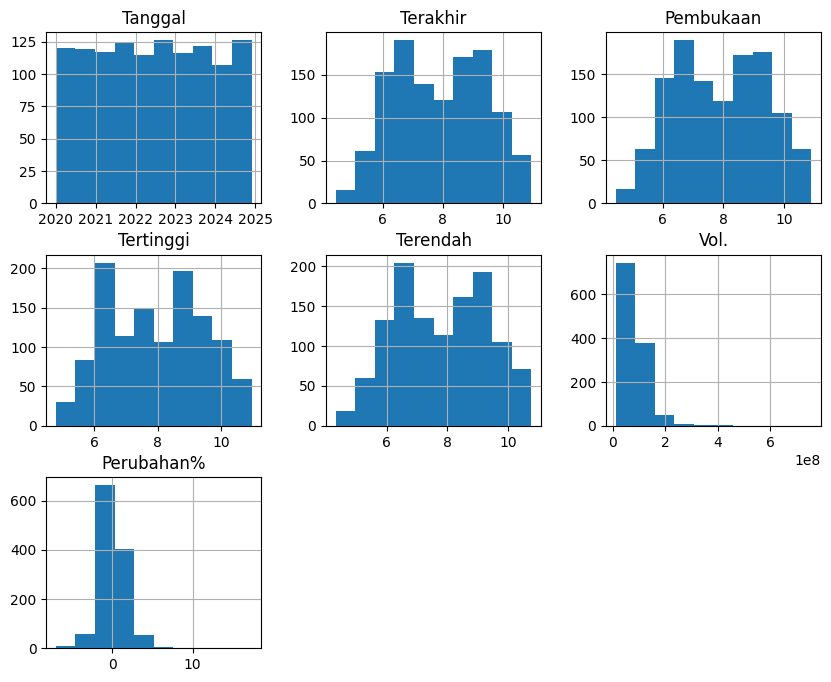

In [7]:
df.hist(figsize=(10, 8))

### Box Plot

<Axes: >

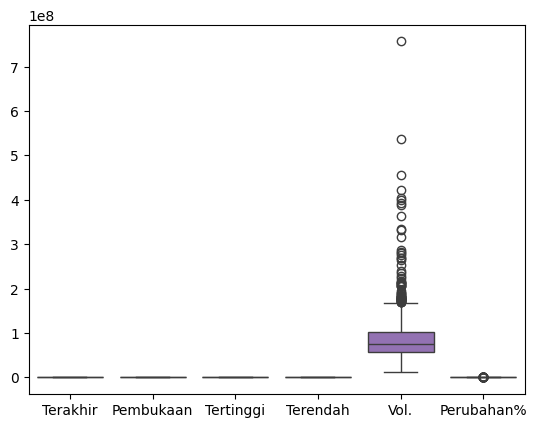

In [8]:
sns.boxplot(data=df)

### Scatter Plot

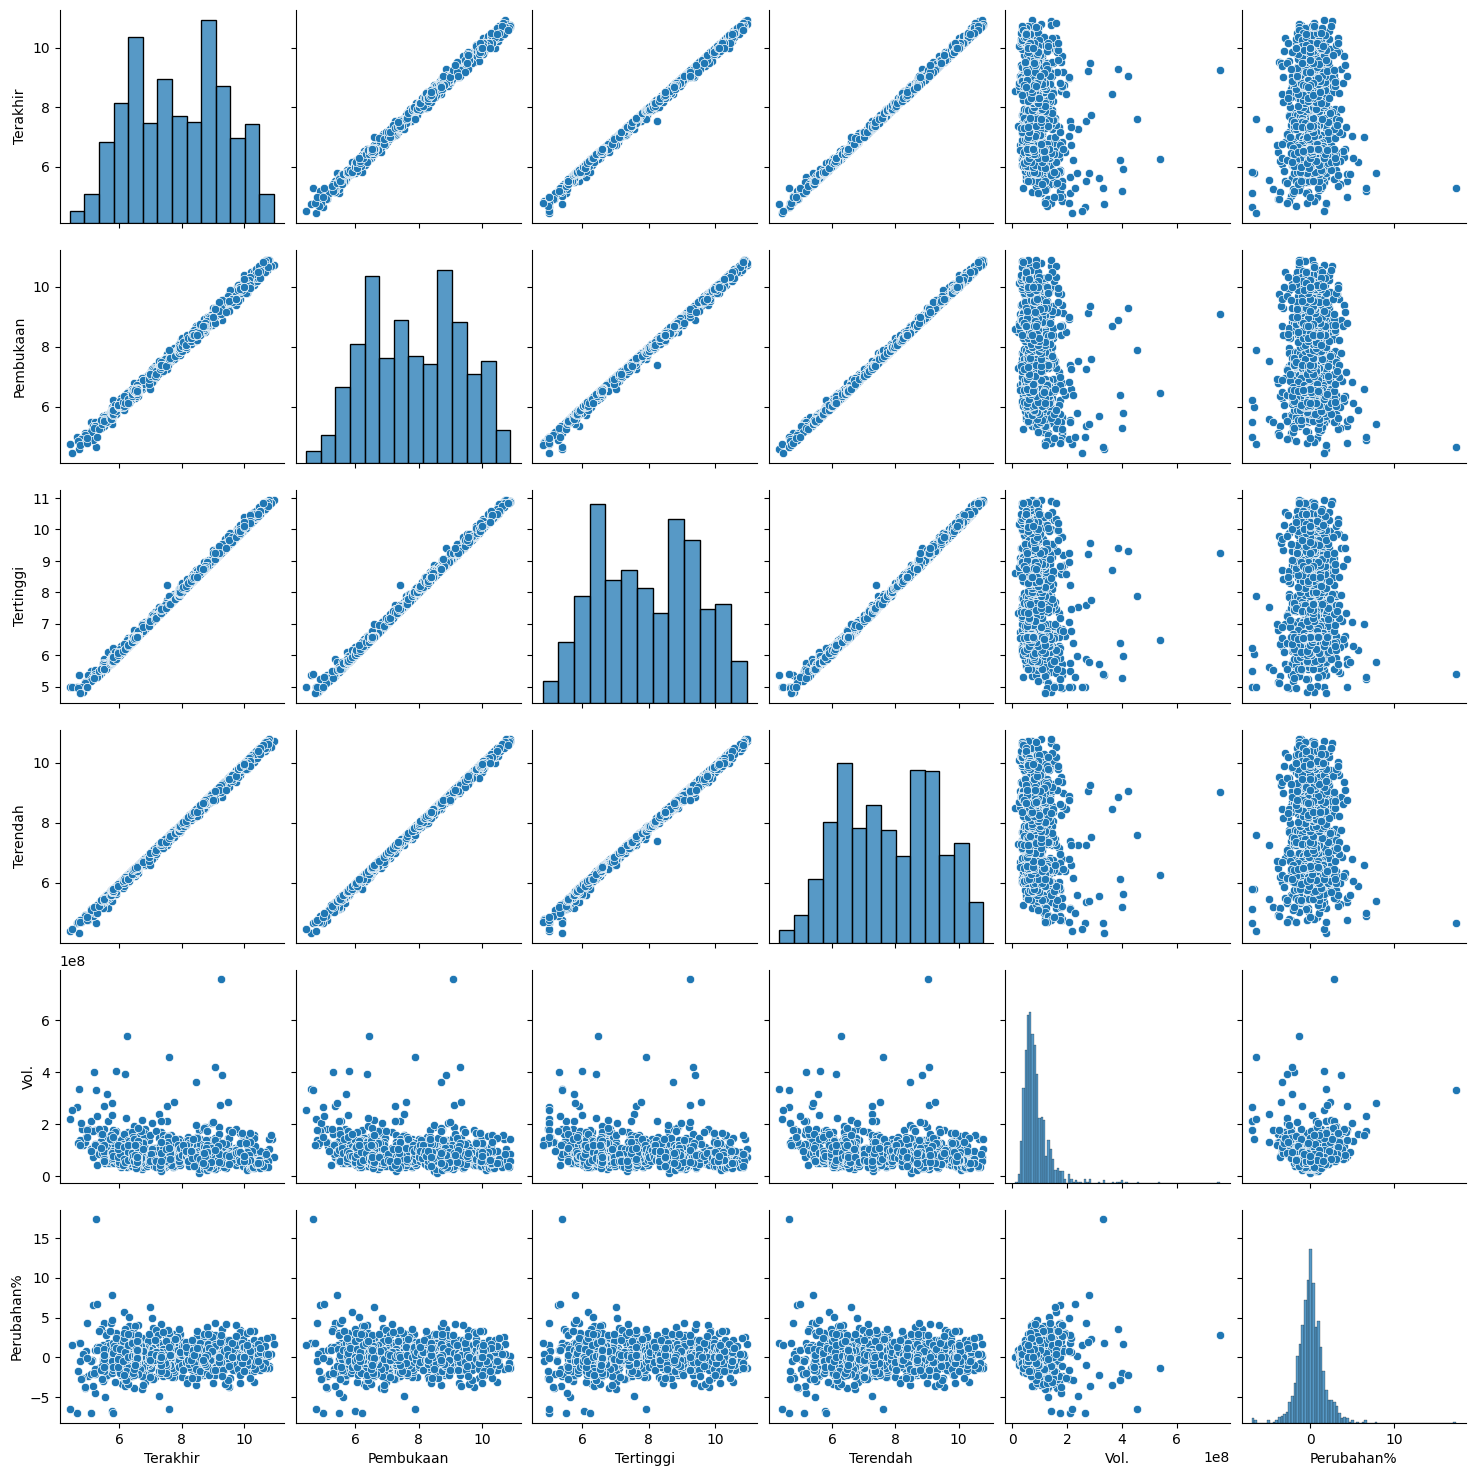

In [9]:
sns.pairplot(df)

### Korelasi Fitur

             Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah      Vol.  \
Tanggal     1.000000  0.954052   0.953257   0.954219  0.954276 -0.168952   
Terakhir    0.954052  1.000000   0.997485   0.998712  0.998786 -0.187364   
Pembukaan   0.953257  0.997485   1.000000   0.998525  0.998932 -0.191435   
Tertinggi   0.954219  0.998712   0.998525   1.000000  0.998364 -0.172300   
Terendah    0.954276  0.998786   0.998932   0.998364  1.000000 -0.202146   
Vol.       -0.168952 -0.187364  -0.191435  -0.172300 -0.202146  1.000000   
Perubahan%  0.005946  0.037925  -0.018475   0.011126  0.005171  0.038654   

            Perubahan%  
Tanggal       0.005946  
Terakhir      0.037925  
Pembukaan    -0.018475  
Tertinggi     0.011126  
Terendah      0.005171  
Vol.          0.038654  
Perubahan%    1.000000  


<Axes: >

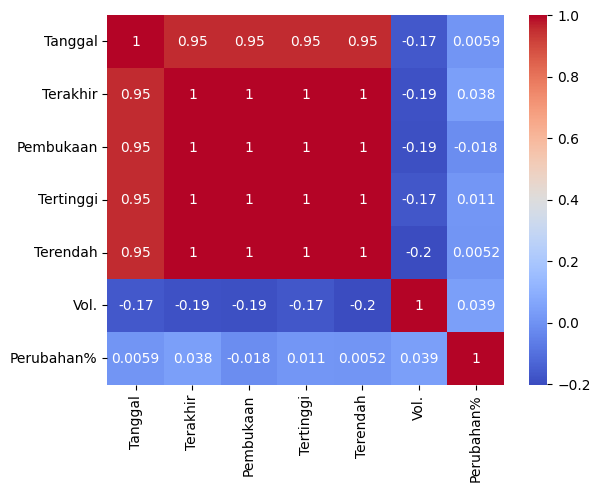

In [10]:
correlation_matrix = df.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

### Pergerakan Harga

#### Perbandingan harga Pembukaan dan Terakhir

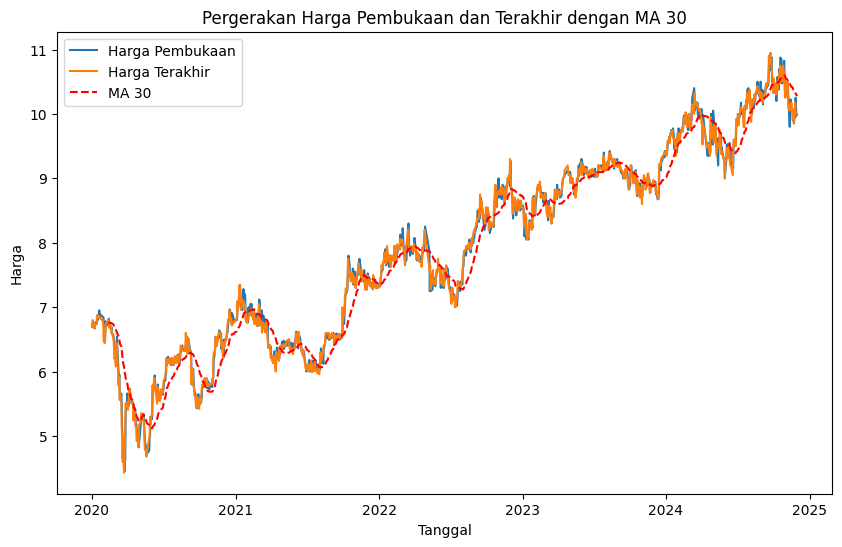

In [11]:
# Calculate 30-day moving average
df['MA30'] = df['Terakhir'].rolling(window=30).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['Tanggal'], df['Pembukaan'], label='Harga Pembukaan')
plt.plot(df['Tanggal'], df['Terakhir'], label='Harga Terakhir')
plt.plot(df['Tanggal'], df['MA30'], label='MA 30', linestyle='--', color='red')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.title('Pergerakan Harga Pembukaan dan Terakhir dengan MA 30')
plt.legend()
plt.show()

#### Perbandingan harga Tertinggi dan Terendah

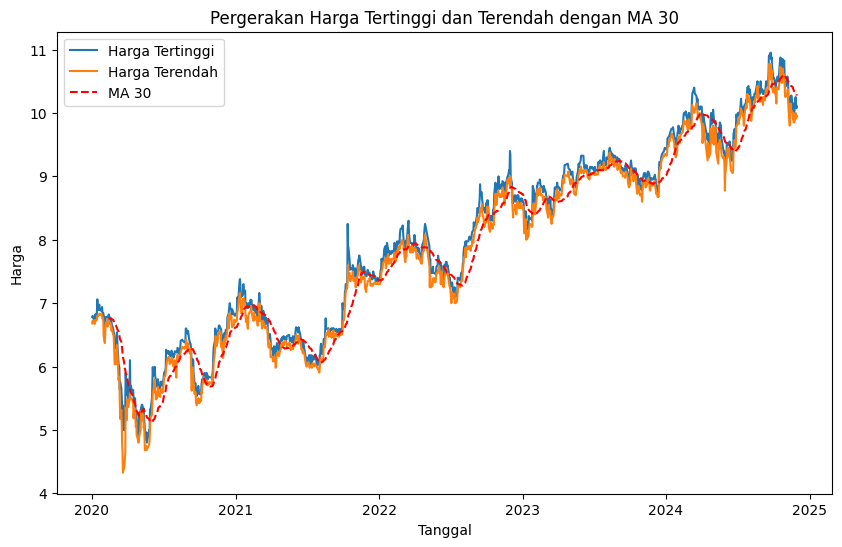

In [12]:
# Calculate 30-day moving average
df['MA30'] = df['Terakhir'].rolling(window=30).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['Tanggal'], df['Tertinggi'], label='Harga Tertinggi')
plt.plot(df['Tanggal'], df['Terendah'], label='Harga Terendah')
plt.plot(df['Tanggal'], df['MA30'], label='MA 30', linestyle='--', color='red')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.title('Pergerakan Harga Tertinggi dan Terendah dengan MA 30')
plt.legend()
plt.show()

## Pre-Processing

### Seleksi Fitur

In [13]:
selected_features = ['Tanggal', 'Pembukaan']
df = df[selected_features]

df.set_index('Tanggal', inplace=True)

df

,Pembukaan
Tanggal,
2020-01-02,6.695
2020-01-03,6.750
2020-01-06,6.720
2020-01-07,6.735
2020-01-08,6.670
...,...
2024-11-22,9.925
2024-11-25,9.950
2024-11-26,10.250


### Deteksi Outlier

#### Metode Local Outlier Factor (LOF)

In [14]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(df)
print(y_pred)
print(np.where(y_pred == -1))
print(clf.negative_outlier_factor_)

[1 1 1 ... 1 1 1]
(array([   4,   32,   34,   35,   40,   49,   56,   57,   58,   59,   60,
         74,   76,   82,   85,   86,   87,   88,   89,   93,   94,   95,
         96,   99,  100,  101,  105,  125,  129,  163,  164,  204,  205,
        216,  224,  226,  234,  249,  257,  263,  292,  293,  295,  304,
        322,  323,  328,  335,  338,  343,  350,  355,  358,  389,  430,
        431,  432,  437,  439,  444,  449,  463,  470,  471,  472,  491,
        528,  530,  540,  547,  565,  569,  570,  573,  578,  599,  601,
        606,  609,  611,  618,  622,  631,  632,  641,  643,  644,  645,
        689,  708,  711,  725,  728,  732,  746,  778,  782,  936,  943,
        946,  971, 1006, 1050, 1084, 1141, 1142, 1143, 1144, 1145, 1146,
       1157, 1159, 1160, 1161, 1162, 1163, 1166, 1167, 1168, 1169]),)
[-1.12145785 -1.01331066 -0.99124929 ... -1.00218762 -0.98732057
 -0.94554397]


#### Metode Box Plot (Interquartile)

<Axes: >

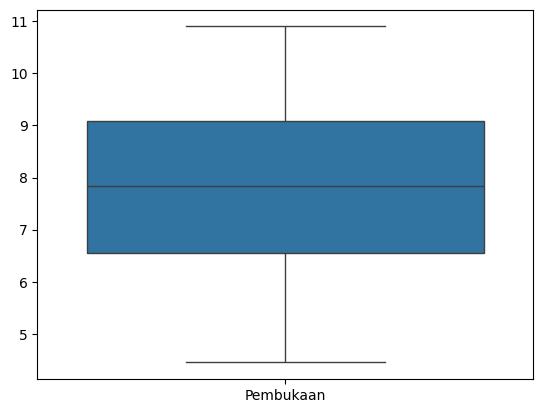

In [15]:
sns.boxplot(data=df)

#### Membuat lag feature

In [16]:
def create_lagged_features(data, lags):
    features = pd.DataFrame()
    for lag in range(1, lags + 1):
        features[f'Lag_{lag}'] = data.shift(lag)
    return features

In [ ]:
lags = 90
lagged_features = create_lagged_features(df['Pembukaan'], lags)
df_with_lags = pd.concat([df, lagged_features], axis=1).dropna()

In [18]:
# Split data into features (X) and target (y)
X = df_with_lags[[f'Lag_{i}' for i in range(1, lags + 1)]]
y = df_with_lags['Pembukaan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


## Modelling

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [20]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.022960056415546323
Mean Absolute Error (MAE): 0.11535445318437261
Mean Absolute Percentage Error (MAPE): 0.011635162610601374
R-squared (R2): 0.8964008076701613


In [23]:
X

,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7
Tanggal,,,,,,,
2020-01-13,6.765,6.740,6.670,6.735,6.720,6.750,6.695
2020-01-14,6.740,6.765,6.740,6.670,6.735,6.720,6.750
2020-01-15,6.745,6.740,6.765,6.740,6.670,6.735,6.720
2020-01-16,6.870,6.745,6.740,6.765,6.740,6.670,6.735
2020-01-17,6.805,6.870,6.745,6.740,6.765,6.740,6.670
...,...,...,...,...,...,...,...
2024-11-22,10.000,10.025,9.900,10.075,10.050,10.125,10.225
2024-11-25,9.925,10.000,10.025,9.900,10.075,10.050,10.125
2024-11-26,9.950,9.925,10.000,10.025,9.900,10.075,10.050


In [22]:
latest_lags = X.iloc[-1].values.reshape(1, -1) 
next_value = model.predict(latest_lags)
print(f'Next Forecasted Value: {next_value[0]}')

Next Forecasted Value: 9.975915507310853


/home/wchynto/.local/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
